<a href="https://colab.research.google.com/github/Shantnu-Talokar/ML_Lab_ShantnuTalokar/blob/main/BonusAssignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5 

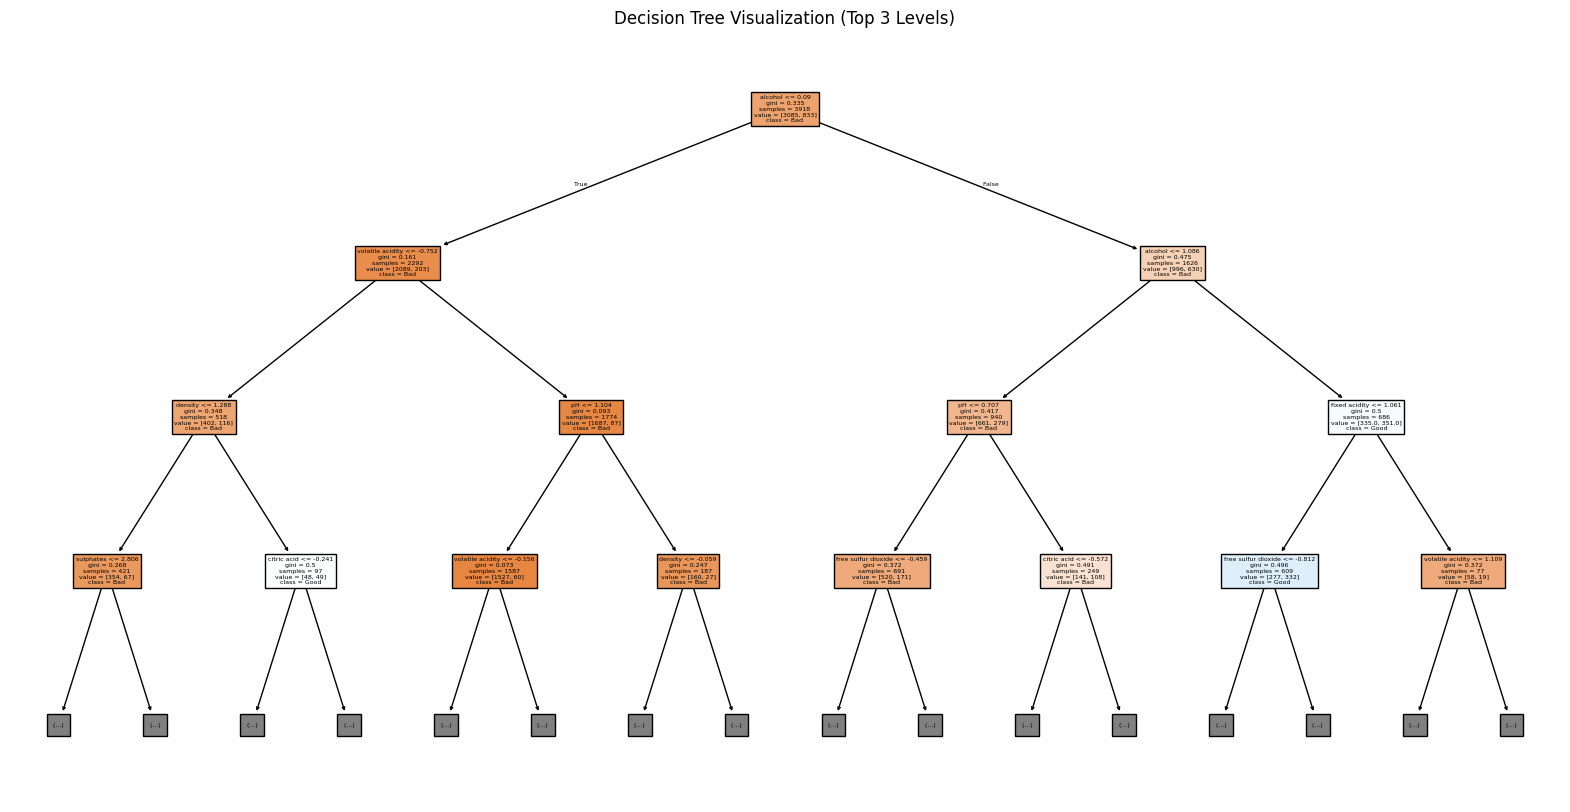


Classification Report:
              precision    recall  f1-score   support

         Bad       0.90      0.87      0.88       753
        Good       0.61      0.67      0.64       227

    accuracy                           0.82       980
   macro avg       0.75      0.77      0.76       980
weighted avg       0.83      0.82      0.83       980


Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

Tuned Model Performance:
Accuracy: 0.83
Precision: 0.63
Recall: 0.69
F1 Score: 0.66


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

print("First few rows of the dataset:")
print(df.head())

print("\nMissing values:")
print(df.isnull().sum())

X = df.drop("quality", axis=1)
y = df["quality"]

y_binary = y.apply(lambda val: 1 if val >= 7 else 0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Bad", "Good"], max_depth=3)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()

y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Bad", "Good"]))

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)

print("\nTuned Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_best_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_best_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_best_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_best_pred):.2f}")
